In [1]:
%cd ..

C:\Users\Brown Research\Documents\vr-exoskeleton


# explore

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils

In [3]:
# Colored text: https://stackoverflow.com/a/64020586/1559071

color2num = dict(
    gray=30,
    red=31,
    green=32,
    yellow=33,
    blue=34,
    magenta=35,
    cyan=36,
    white=37,
    crimson=38
)

def colorize(string, color, bold=False, highlight=False):
    attr = []
    num = color2num[color]
    if highlight:
        num += 10
    attr.append(str(num))
    if bold:
        attr.append('1')
    return '\x1b[%sm%s\x1b[0m' % (';'.join(attr), string)

In [4]:
# Print user data in a table.

def print_user_task_table(item_print_fn, w_task=32, skip_user_fn=None):
    print('  User  ', end='')
    for task in tasks:
        print('|  {:>{w}}  '.format(task, w=w_task), end='')
    print()
    
    print('========', end='')
    for _ in tasks:
        print('+' + ('=' * (w_task + 4)), end='')
    print()
    
    for user in users:
        if skip_user_fn is not None and skip_user_fn(user):
            continue
        print(f'{user:>7} ', end='')
        for task in tasks:
            print('|  {}  '.format(item_print_fn(user, task)), end='')
        print()

## Open files

In [5]:
users, tasks, user_task_paths = data_utils.get_user_task_paths()
print(users[:5])
tasks

['User1', 'User2', 'User3', 'User4', 'User5']


['ArcSmoothPursuit',
 'LinearSmoothPursuit',
 'RapidVisualSearch',
 'RapidVisualSearchAvoidance']

In [6]:
with open(user_task_paths[users[0]][tasks[0]][0]) as fd:
    user0_task0_0_lines = [line.strip() for line in fd.readlines()]
print(len(user0_task0_0_lines))
for line in user0_task0_0_lines[:8]:
    print(line)

10802
time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
441447,-0.008895874,0.08401489,0.9964142,-0.01121521,0.0809021,0.9966583,0.02062806,0.2344575,0.9719075
441455,-0.008895874,0.08320618,0.9964905,-0.01086426,0.08082581,0.9966583,0.02052364,0.2352921,0.971708
441463,-0.008880615,0.08288574,0.9965057,-0.01095581,0.07977295,0.9967499,0.02054862,0.2363074,0.9714611
441471,-0.008895874,0.08195496,0.996582,-0.01092529,0.07943726,0.9967651,0.02048668,0.2375305,0.971164
441480,-0.008850098,0.08207703,0.996582,-0.01083374,0.07948303,0.9967651,0.02048668,0.2375305,0.971164
441488,-0.008850098,0.08207703,0.996582,-0.01176453,0.07951355,0.9967499,0.02044128,0.2388268,0.970847
441496,-0.008865356,0.0813446,0.9966431,-0.01174927,0.0788269,0.9968109,0.02035893,0.2400123,0.9705563


In [7]:
df_user0_task0_0 = pd.read_csv(user_task_paths[users[0]][tasks[0]][0])
print(len(df_user0_task0_0))
df_user0_task0_0.head(10)

10801


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
0,441447,-0.008896,0.084015,0.996414,-0.011215,0.080902,0.996658,0.020628,0.234458,0.971908
1,441455,-0.008896,0.083206,0.996490,-0.010864,0.080826,0.996658,0.020524,0.235292,0.971708
2,441463,-0.008881,0.082886,0.996506,-0.010956,0.079773,0.996750,0.020549,0.236307,0.971461
3,441471,-0.008896,0.081955,0.996582,-0.010925,0.079437,0.996765,0.020487,0.237531,0.971164
4,441480,-0.008850,0.082077,0.996582,-0.010834,0.079483,0.996765,0.020487,0.237531,0.971164
5,441488,-0.008850,0.082077,0.996582,-0.011765,0.079514,0.996750,0.020441,0.238827,0.970847
6,441496,-0.008865,0.081345,0.996643,-0.011749,0.078827,0.996811,0.020359,0.240012,0.970556
7,441505,-0.008987,0.081131,0.996658,-0.012039,0.078293,0.996841,0.020337,0.241357,0.970223
8,441513,-0.008881,0.077972,0.996903,-0.012650,0.077805,0.996887,0.020337,0.241357,0.970223
9,441521,-0.008926,0.077133,0.996979,-0.014999,0.077377,0.996887,0.020261,0.242571,0.969922


In [8]:
COL_TIME_STAMP = df_user0_task0_0.columns[0]
COL_EYE_L_X = df_user0_task0_0.columns[1]
COL_EYE_L_Y = df_user0_task0_0.columns[2]
COL_EYE_L_Z = df_user0_task0_0.columns[3]
COL_EYE_R_X = df_user0_task0_0.columns[4]
COL_EYE_R_Y = df_user0_task0_0.columns[5]
COL_EYE_R_Z = df_user0_task0_0.columns[6]
COL_HEAD_X = df_user0_task0_0.columns[7]
COL_HEAD_Y = df_user0_task0_0.columns[8]
COL_HEAD_Z = df_user0_task0_0.columns[9]

## Basic Stats

In [9]:
print(tasks[0])
df_user0_task0_0.describe()

ArcSmoothPursuit


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,486437.684566,0.063958,0.035829,0.944820,0.068720,0.045066,0.939738,0.133754,0.312787,0.749093
std,25979.148837,0.119069,0.130748,0.184874,0.120199,0.129147,0.195141,0.438118,0.328535,0.152583
min,441447.000000,-0.360886,-0.343018,0.000000,-0.383331,-0.396423,0.000000,-0.811693,-0.390750,0.429818
25%,463942.000000,0.000000,-0.039246,0.969940,0.000000,-0.027313,0.969345,-0.245685,0.136369,0.615868
50%,486438.000000,0.051453,0.019226,0.985306,0.056305,0.031921,0.985001,0.203632,0.332524,0.759155
75%,508933.000000,0.134308,0.117615,0.995560,0.144455,0.125061,0.994888,0.538184,0.566231,0.872404
max,531427.000000,0.466064,0.418167,0.999985,0.483841,0.439423,0.999985,0.828488,0.887138,0.999863


In [10]:
print(tasks[1])
df_user0_task1_0 = pd.read_csv(user_task_paths[users[0]][tasks[1]][0])
df_user0_task1_0.describe()

LinearSmoothPursuit


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,178474.807518,0.042147,-0.053470,0.938646,0.047102,-0.045979,0.933086,0.238317,-0.033659,0.775278
std,25978.996464,0.111108,0.200411,0.172491,0.112907,0.201004,0.185616,0.371593,0.433459,0.122799
min,133485.000000,-0.341721,-0.520203,0.000000,-0.378403,-0.482788,0.000000,-0.779199,-0.701496,0.524195
25%,155980.000000,-0.013351,-0.199677,0.953507,-0.009964,-0.189652,0.952255,-0.012614,-0.418054,0.674717
50%,178474.000000,0.049301,-0.084213,0.974960,0.057037,-0.070969,0.974060,0.375466,-0.115983,0.769912
75%,200971.000000,0.115921,0.108200,0.989197,0.121704,0.120102,0.989319,0.526421,0.372804,0.878646
max,223465.000000,0.435791,0.474380,0.999985,0.443329,0.492523,0.999985,0.795748,0.799980,0.999979


In [11]:
print(tasks[2])
df_user0_task2_0 = pd.read_csv(user_task_paths[users[0]][tasks[2]][0])
df_user0_task2_0.describe()

RapidVisualSearch


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,1.080100e+04,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,1.127150e+06,-0.027548,0.006897,0.956451,-0.023523,0.012952,0.947908,0.020371,0.002301,0.714362
std,2.597913e+04,0.155223,0.164853,0.127881,0.154002,0.160385,0.158128,0.548122,0.401621,0.166066
min,1.082159e+06,-0.641327,-0.511231,0.000000,-0.630035,-0.520935,0.000000,-0.909803,-0.688965,0.133600
25%,1.104654e+06,-0.107971,-0.106369,0.962158,-0.103699,-0.094467,0.962433,-0.485413,-0.379416,0.572670
50%,1.127149e+06,-0.023102,0.012299,0.981354,-0.017578,0.016235,0.981552,-0.025261,-0.002858,0.733259
75%,1.149645e+06,0.053177,0.139938,0.991791,0.056961,0.141419,0.992538,0.568478,0.351368,0.844032
max,1.172141e+06,0.582031,0.444550,0.999985,0.598267,0.440720,0.999985,0.933570,0.750379,0.999731


In [12]:
print(tasks[3])
df_user0_task3_0 = pd.read_csv(user_task_paths[users[0]][tasks[3]][0])
df_user0_task3_0.describe()

RapidVisualSearchAvoidance


,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z
count,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000,10801.000000
mean,814412.956208,0.013894,0.046526,0.938138,0.014818,0.057196,0.937141,0.107159,0.095749,0.736868
std,25979.093938,0.142437,0.165420,0.183763,0.142029,0.162270,0.186108,0.533932,0.362020,0.142384
min,769422.000000,-0.509094,-0.555557,0.000000,-0.517746,-0.585709,0.000000,-0.966968,-0.680869,0.248403
25%,791918.000000,-0.050522,-0.058212,0.960632,-0.044861,-0.038162,0.960907,-0.389865,-0.188042,0.622612
50%,814412.000000,0.011398,0.079788,0.983154,0.014709,0.087799,0.982269,0.264142,0.172848,0.748374
75%,836909.000000,0.076080,0.151032,0.992035,0.077835,0.164230,0.991974,0.617866,0.404179,0.848357
max,859404.000000,0.559708,0.472855,0.999969,0.554855,0.511841,0.999985,0.926262,0.833213,0.999839


### Frames

Some trials don't have exactly `10801` frames for some reason... So we can't cleanly divide the entire flattened data set by that number.

In [13]:
user_task_frames = {user: {task: list() for task in tasks}
                    for user in users}
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            user_task_frames[user][task].append(len(df))
print_user_task_table(lambda user_, task_: ' '.join('{:>10d}'.format(frames)
                                                    for frames in user_task_frames[user_][task_]),
                      skip_user_fn=lambda user_: all(all(frames == 10801 for
                                                         frames in user_task_frames[user_][task_])
                                                     for task_ in tasks))

  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
 User19 |       10801      10801      10801  |       10801      10801      10801  |       10800      10801      10801  |       10801      10801      10801  
 User20 |       10801      10801      10801  |       10801      10801      10801  |       10801      10800      10801  |       10801      10801      10800  


### Distributions

Do we see any obvious skew or anomalies for the first user, task, and trial?

In [14]:
def plot_hist(df, bins=128):
    _, axs = plt.subplots(3, 3, figsize=(12, 8.1))
    row_cols = [[COL_EYE_L_X, COL_EYE_L_Y, COL_EYE_L_Z],
                [COL_EYE_R_X, COL_EYE_R_Y, COL_EYE_R_Z],
                [COL_HEAD_X, COL_HEAD_Y, COL_HEAD_Z]]
    for i, cols in enumerate(row_cols):
        for j, col in enumerate(cols):
            axs[i][j].hist(df[col], bins=bins)
            axs[i][j].set_title(col)
    plt.tight_layout()
    plt.show()

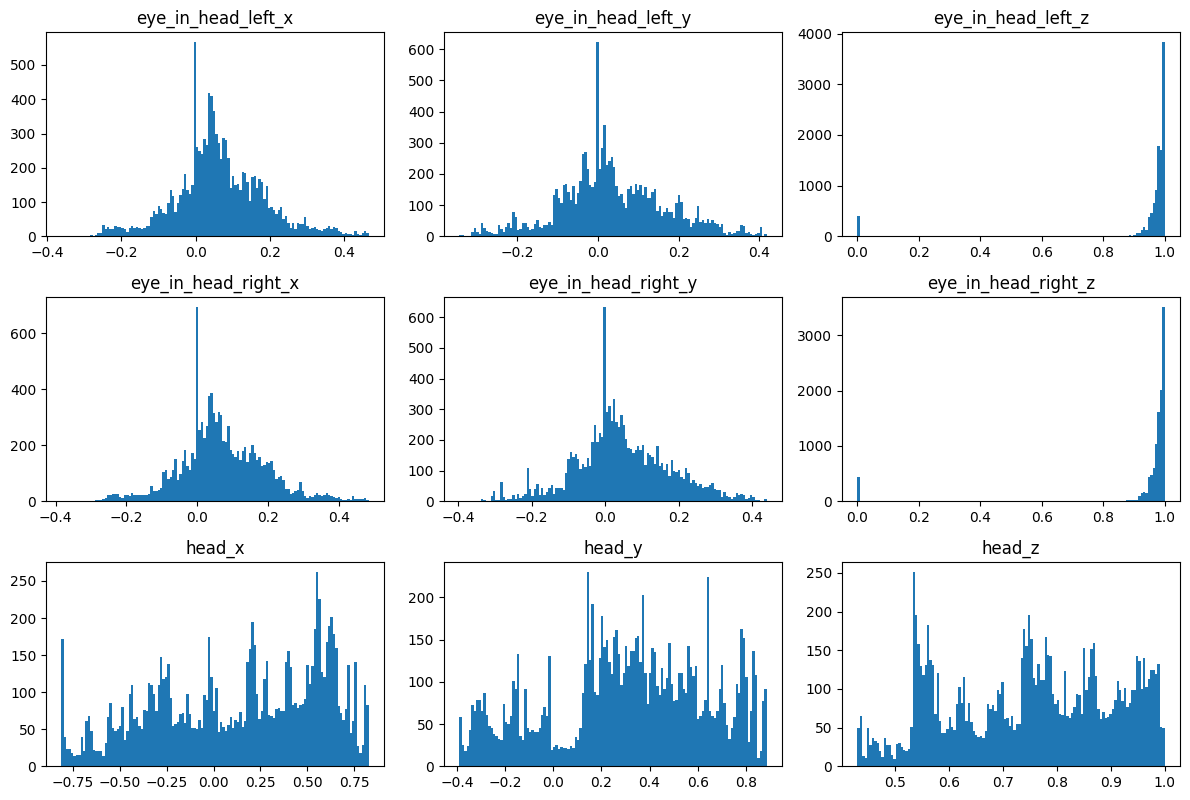

In [15]:
plot_hist(df_user0_task0_0)

The `z` component of both eye gazes obviously has its mean centered around `1.0`, but a small anomalous spike is present at `0.0`. The `x` and `y` components seem to have spikes at `0.0` as well, although `0.0` appears to be a valid value.

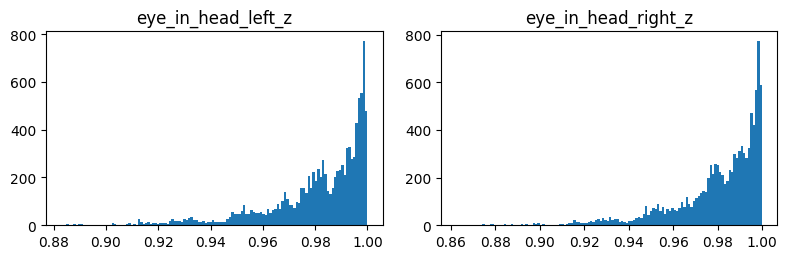

In [16]:
# Plot main distribution of z component of eye gaze.

fig, axes = plt.subplots(1, 2, figsize=(8, 2.7))
for i, col in enumerate([COL_EYE_L_Z, COL_EYE_R_Z]):
    series = df_user0_task0_0[col].to_numpy()
    x = np.array([v for v in series if v > 0.5])
    axes[i].hist(x, bins=128)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## Blinking 😑

Let's check the left and right eyes' minimum `z` component for all users, all tasks, and all trials.

In [17]:
def str_highlight_zero(x):
    s = f'{x:.1f}'
    return s if x > 0.1 else colorize(s, color='red')


user_task_z_pair_mins = {user: {task: list() for task in tasks}
                         for user in users}
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            user_task_z_pair_mins[user][task].append((df[COL_EYE_L_Z].min(), df[COL_EYE_R_Z].min()))
print_user_task_table(lambda user_, task_: ' '.join('({}, {})'.format(str_highlight_zero(pair[0]), str_highlight_zero(pair[1]))
                                                    for pair in user_task_z_pair_mins[user_][task_]))

  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User2 |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User3 |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User4 |  (0.0, 0.0) (0.0, 0.0) (0.9, 0.9)  |  (0.0, 0.0) (0.8, 0.8) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)  
  User5 |  (0.8, 0.9) (0.0, 0.0) (0.0, 0.0)  |  (0.0, 0.0)

We have to be careful because it seems that sometimes only one eye blinks throughout a given trial. This implies that not all eye blinks are necessarily simultaneous. 😉

First, let's check whether or not `z == 0` is a perfect discriminator of a closed eye. Check that every `x` and `y` that is paired with a zero-valued `z` is also zero.

In [18]:
is_z_perfect = True
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            df_z0_left = df[df[COL_EYE_L_Z] == 0.0]
            for _, row in df_z0_left.iterrows():
                if row[COL_EYE_L_X] != 0.0 or row[COL_EYE_L_Y] != 0.0:
                    print(row)
                    is_z_perfect = False
            df_z0_right = df[df[COL_EYE_R_Z] == 0.0]
            for _, row in df_z0_right.iterrows():
                if row[COL_EYE_R_X] != 0.0 or row[COL_EYE_R_Y] != 0.0:
                    print(row)
                    is_z_perfect = False
is_z_perfect

True

### Frequency

Let's count how often each user blinks or winks for each trial.

In [19]:
user_task_trial_intervals = {user: {task: list() for task in tasks}
                             for user in users}
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            df_blink = df[(df[COL_EYE_L_Z] == 0.0) | (df[COL_EYE_R_Z] == 0.0)]
            trial_intervals = list()
            if len(df_blink) > 0:  # User may not have blinked during a trial.
                start_blink = df_blink.index[0]
                for i in range(1, len(df_blink.index)):
                    if df_blink.index[i - 1] != df_blink.index[i] - 1:
                        trial_intervals.append((start_blink, df_blink.index[i - 1]))
                        start_blink = df_blink.index[i]
                trial_intervals.append((start_blink, df_blink.index[-1]))
            user_task_trial_intervals[user][task].append(trial_intervals)

print('TOTAL NUMBER OF BLINKING FRAMES (OUT OF {:d})'.format(len(df_user0_task0_0)))
print_user_task_table(lambda user_, task_: ' '.join('{:>10d}'.format(sum(end + 1 - start for start, end in trial_intervals))
                                                    for trial_intervals in user_task_trial_intervals[user_][task_]))

TOTAL NUMBER OF BLINKING FRAMES (OUT OF 10801)
  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |         460        746        441  |         416        532        500  |         298        383        641  |         461        634        545  
  User2 |          75        312        218  |         233        136         88  |         100         99         48  |         111         16        109  
  User3 |         107        132        144  |         225        161        224  |        1582        773        948  |         508        723        537  
  User4 |          14         28          0  |         120          0         14  |          25         53        103  |         165         45         87  
  User5 |  

It's not surprising that some users blink more than others. It seems like we can drop the blinked rows.

### Duration

During a meeting Ian asked, "how _long_ are the blinks?"

In [20]:
def blink_duration_mean_str(trial_intervals_):
    if len(trial_intervals_) == 0:
        return '         -'
    f_str_ = '{:.4f}'.format(sum(end_ + 1 - start_ for start_, end_ in trial_intervals_) / len(trial_intervals_))
    return '{:>10}'.format(f_str_)


print('AVERAGE DURATION OF BLINK')
print_user_task_table(lambda user_, task_: ' '.join(blink_duration_mean_str(trial_intervals)
                                                    for trial_intervals in user_task_trial_intervals[user_][task_]))

AVERAGE DURATION OF BLINK
  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |     19.1667    19.6316    22.0500  |     18.9091    22.1667    20.8333  |     13.5455    12.7667    14.5682  |     15.8966    15.8500    16.5152  
  User2 |     18.7500    20.8000    19.8182  |     23.3000    22.6667    17.6000  |      9.0909    14.1429    12.0000  |     13.8750     8.0000     9.9091  
  User3 |     17.8333    18.8571    18.0000  |     16.0714    20.1250    20.3636  |      8.9886     6.7217     7.4062  |      9.7692     9.2692     8.0149  
  User4 |      7.0000    14.0000          -  |     24.0000          -    14.0000  |      5.0000     3.1176     4.9048  |      6.6000     3.4615     4.3500  
  User5 |           -    23.1818

Finally, how many _times_ did users blink?

In [21]:
print('NUMBER OF CONTIGUOUS BLINKING SEGMENTS')
print_user_task_table(lambda user_, task_: ' '.join('{:>10d}'.format(len(trial_intervals_))
                                                                     for trial_intervals_ in user_task_trial_intervals[user_][task_]))

NUMBER OF CONTIGUOUS BLINKING SEGMENTS
  User  |                  ArcSmoothPursuit  |               LinearSmoothPursuit  |                 RapidVisualSearch  |        RapidVisualSearchAvoidance  
========+====================================+====================================+====================================+====================================
  User1 |          24         38         20  |          22         24         24  |          22         30         44  |          29         40         33  
  User2 |           4         15         11  |          10          6          5  |          11          7          4  |           8          2         11  
  User3 |           6          7          8  |          14          8         11  |         176        115        128  |          52         78         67  
  User4 |           2          2          0  |           5          0          1  |           5         17         21  |          25         13         20  
  User5 |          

## Trajectories

Let's track the movement of eyes and the head for a random trial.

In [22]:
rng = np.random.default_rng(seed=5)

In [23]:
steps = 2 ** 8

User: User7
Task: ArcSmoothPursuit
Trial: 1
Starting frame: 9441


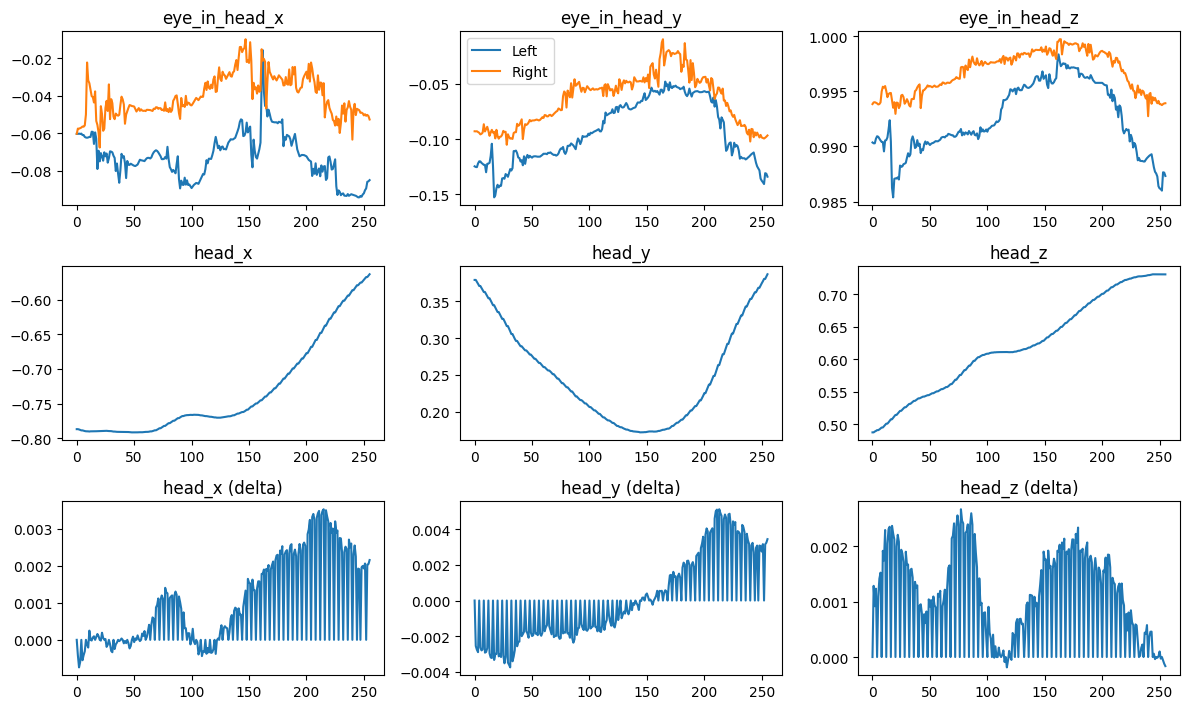

In [43]:
user = rng.choice(users)
task = rng.choice(tasks)
trial = rng.integers(3)
offset = rng.integers(10800 - steps)
print(f'User: {user}')
print(f'Task: {task}')
print(f'Trial: {trial:d}')
print(f'Starting frame: {offset:d}')

df = pd.read_csv(user_task_paths[user][task][trial])

def plot_trajectory_sample(df, offset, steps):
    fig, axes = plt.subplots(3, 3, figsize=(12, 7.2))
    for j, dim in enumerate(['x', 'y', 'z']):
        eye_cols, sides = ['eye_in_head_left', 'eye_in_head_right'], ['Left', 'Right']
        for i, (eye_col, side) in enumerate(zip(eye_cols, sides)):
            x = df[f'{eye_col}_{dim}'].to_numpy()
            axes[0, j].plot(x[offset:offset + steps], label=side)
        axes[0, j].set_title(f'eye_in_head_{dim}')
        if j == 1:
            axes[0, j].legend()
        
        x_head = df[f'head_{dim}'].to_numpy()
        axes[1, j].plot(x_head[offset:offset + steps])
        axes[1, j].set_title(f'head_{dim}')
        
        x_head_delta = x_head[1:] - x_head[:-1]
        axes[2, j].plot(x_head_delta[offset:offset + steps])
        axes[2, j].set_title(f'head_{dim} (delta)')
    plt.tight_layout()
    plt.show()

plot_trajectory_sample(df, offset, steps)

- **Eyes**: The trajectories for eyes are choppy. I think the eye tracker readings are slightly inaccurate; either that, or our eyes really do oscillate a tiny bit all the time.
- **Head**: The head movements are somewhat smooth... except the latency for the accelerometer (or whatever) seems to be slower than the latency of the eye tracker. It looks like the head position is repeated (i.e., a new position is not sensed) at about every fourth frame.
- **Head delta**: The 'saw tooth' effect when trying to predict the relative change in head position.

### Frame Rate

The data was collected at 120Hz, the rate of the eye tracker's callback function. However, the game runs at ~90 Hz. We can eliminate repeated head positions, which approximates the data at the game's update loop's frame rate.

Frames: 8094
Frames/sec: 89.9333


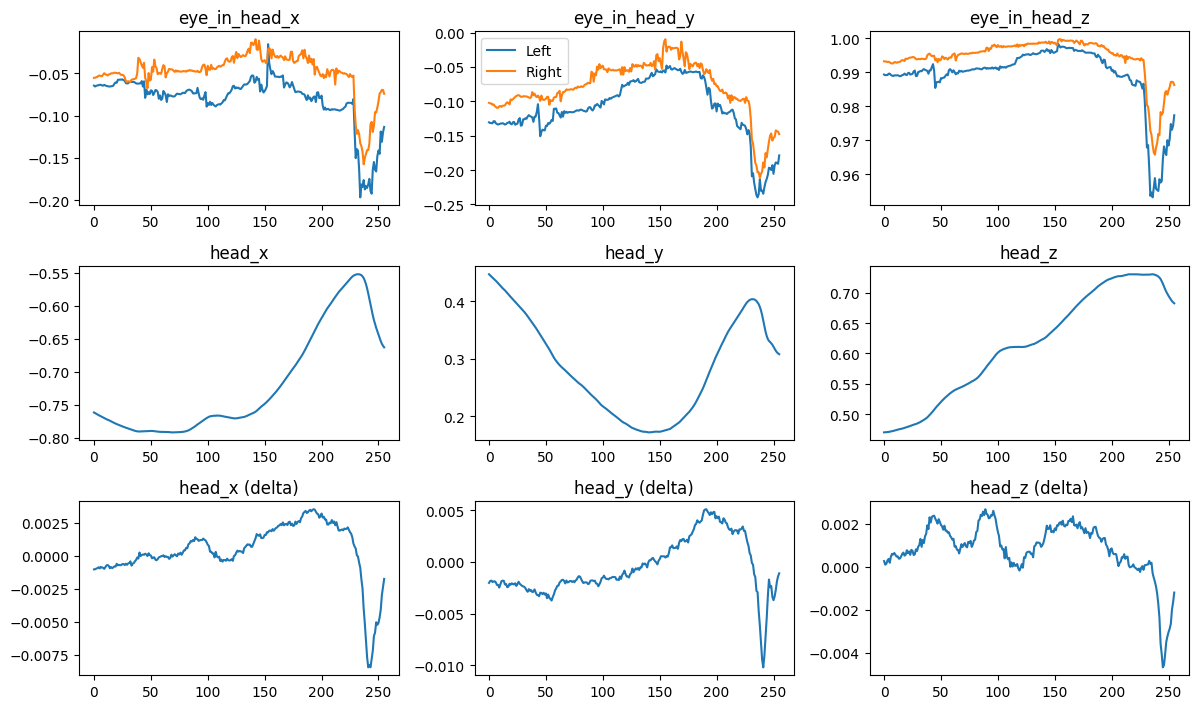

In [44]:
indices_90 = list()
for i in range(1, len(df)):
    if any(v != v_prev for v, v_prev in zip(df.iloc[i, -2:], df.iloc[i - 1, -2:])):
        indices_90.append(i)
df_90 = df.iloc[indices_90]
print('Frames:', len(df_90))
print('Frames/sec: {:.4f}'.format(len(df_90) / data_utils.SECONDS_PER_TRIAL, 'hz'))
ratio = len(df_90) / len(df)
offset_90 = max(0, int((offset + steps / 2) * ratio - steps / 2))
plot_trajectory_sample(df_90, offset_90, steps)

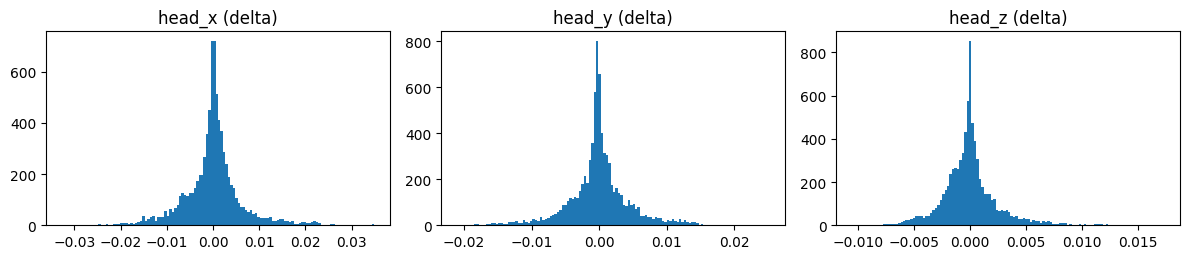

In [39]:
# Plot a histogram of smooth deltas.

fig, axes = plt.subplots(1, 3, figsize=(12, 2.7))
for i, col in enumerate([COL_HEAD_X, COL_HEAD_Y, COL_HEAD_Z]):
    x_head = df_90[col].to_numpy()
    x_head_delta = x_head[1:] - x_head[:-1]
    axes[i].hist(x_head_delta, bins=128)
    axes[i].set_title(col + ' (delta)')
plt.tight_layout()
plt.show()